In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

Deeplearning.ipynb
Sign-Language-Digits-Dataset



In [5]:
x_l = np.load('Sign-Language-Digits-Dataset/X.npy')
Y_l = np.load('Sign-Language-Digits-Dataset/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')


(-0.5, 63.5, 63.5, -0.5)

In [6]:
X = np.concatenate((x_l[204:409] , x_l[822:1027]),axis= 0)
z= np.zeros(205)
o= np.ones(205)

Y= np.concatenate((z,o),axis=0).reshape(X.shape[0],1)

print(X.shape)
print(Y.shape)

(410, 64, 64)
(410, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 0.15, random_state=42)
number_of_train= X_train.shape[0]
number_of_test= X_test.shape[0]

X_train_flatten= X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten= X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

print(X_train_flatten.shape,X_test_flatten.shape)


(348, 4096) (62, 4096)


In [17]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train= Y_train.T
y_test= Y_test.T

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4096, 348) (4096, 62) (1, 348) (1, 62)


Cost after iterations 0: 14.014222
Cost after iterations 10: 2.540731
Cost after iterations 20: 2.575687
Cost after iterations 30: 2.395910
Cost after iterations 40: 2.182853
Cost after iterations 50: 1.965959
Cost after iterations 60: 1.751413
Cost after iterations 70: 1.531586
Cost after iterations 80: 1.292657
Cost after iterations 90: 1.023871
Cost after iterations 100: 0.720891
Cost after iterations 110: 0.400508
Cost after iterations 120: 0.146989
Cost after iterations 130: 0.033509
Cost after iterations 140: 0.000998


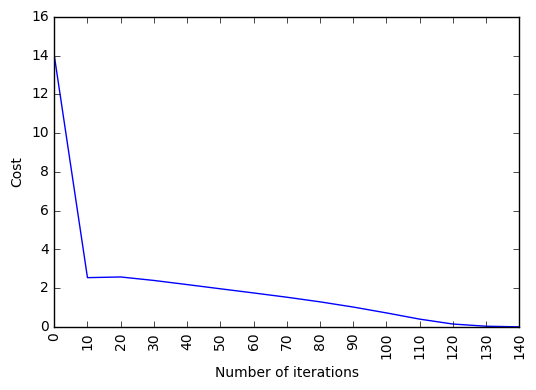

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [52]:
def dummy(parameter):
    dummy_parameter= parameter+ 5
    return dummy_parameter


def initialize_weights_bias_dimension(dimension):
    w= np.full((dimension,1),0.01)
    b= 0.0
    return w,b

def sigmoid(z):
    y_head= 1/(1+ np.exp(-z))
    return y_head

def forward_propagation(w,b,x_train,y_train):
    z= np.dot(w.T,x_train) + b
    y_head= sigmoid(z)
    # -(1-y) log(1-yhead) + y log(yhead)
    loss= y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost= (np.sum(loss))/x_train.shape[1]
    derivative_weight= (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias= np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost,gradients

def update_weights(w,b,x_train,y_train,learning_rate,number_of_iterations):
    cost_list= []
    cost_list2= []
    index=[]
    for i in range(number_of_iterations):
        cost,gradients= forward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w -learning_rate * (gradients["derivative_weight"])
        b= b- learning_rate * (gradients["derivative_bias"])
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iterations %i: %f" %(i,cost))
    parameters= {"weight" : w , "bias" : b}
    plt.plot(index,cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
        
    return parameters,gradients, cost_list
            
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_bias_dimension(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update_weights(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [58]:
from sklearn import linear_model
logistic_regression = linear_model.LogisticRegression(random_state= 42, max_iter= 150)
print ("test accuracy: {} " .format(logistic_regression.fit(x_train.T, y_train.T).score(x_test.T,y_test.T)))
print ("train accuracy: {} " .format(logistic_regression.fit(x_train.T, y_train.T).score(x_train.T,y_train.T)))



test accuracy: 0.967741935483871 
train accuracy: 1.0 
